In [2]:
import screed
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from mpltools import style
import mpld3
#from mpld3 import plugins
#import jinja2
#from mpld3._objects import D3Line2D, D3Collection
#mpld3.disable_notebook()

/opt/anaconda/lib/python2.7/site-packages/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)


In [3]:
style.use("ggplot")

In [4]:
%matplotlib inline

In [1]:
ir1 = "/var/seq_data/Chazy/515_806_SIP/Pool3/Index1.fastq"
ir2 = "/var/seq_data/Chazy/515_806_SIP/Pool3/Index2.fastq"

In [6]:
screed.read_fastq_sequences(ir1)
screed.read_fastq_sequences(ir2)

<ScreedDB, '/var/seq_data/Chazy/515_806_SIP/Pool3/Index2.fastq_screed'>

In [5]:
ir1db = screed.ScreedDB(ir1)
ir2db = screed.ScreedDB(ir2)

In [6]:
df_map = pd.read_csv("data/Metadata_ChazySIP_pool3_515806.txt", delimiter="\t", usecols=[1,6,7], names=["SampleID","i1","i2"])
df_map

,SampleID,i1,i2
0,Full_sample,Rev_index,Fwd_index
1,12C.NTH.D30.R4_Frac18,cgagagtt,atcgtacg
2,12C.NTH.D30.R4_Frac19,cgagagtt,actatctg
3,12C.NTH.D30.R4_Frac20,cgagagtt,tagcgagt
4,12C.NTH.D30.R4_Frac21,cgagagtt,ctgcgtgt
5,12C.NTH.D30.R4_Frac22,cgagagtt,tcatcgag
6,12C.NTH.D30.R4_Frac23,cgagagtt,cgtgagtg
7,12C.NTH.D30.R4_Frac24,cgagagtt,ggatatct
8,12C.NTH.D30.R4_Frac25,cgagagtt,gacaccgt
9,12C.NTH.D30.R4_Frac26,gacatagt,atcgtacg


In [7]:
map_d = dict(map(lambda x: (x[0] + x[1], x[2]), zip(df_map.i1, df_map.i2, df_map.SampleID)))
print map_d.keys()[10], map_d[map_d.keys()[10]]

tatagcgatcatcgag 13X.PTH.D3.R4_Frac12


In [8]:
print map_d

{'tgagtacgactatctg': '13C.NTH.D7.R4_Frac27', 'tatagcgagacaccgt': '13X.PTH.D3.R4_Frac15', 'tatagcgatacgagac': '12C.NTH.D1.R4_Frac13', 'actacgacgatcgtgt': '13C.NTH.D30.R4_Frac16', 'gtctatgactgcgtgt': '12C.NTH.D14.R4_H2O', 'tagtctccggatatct': '12C.PTH.D7.R4_Frac23', 'tatagcgaactatctg': '13X.PTH.D3.R4_Frac9', 'actcactgggatatct': '13C.NTH.D7.R4_Frac24', 'tagtctcctacgagac': '13X.NTH.D1.R4_Frac21', 'cgagcgactcgacgag': '13C.NTH.D30.R4_Frac7', 'tatagcgatcatcgag': '13X.PTH.D3.R4_Frac12', 'tagtctccatcgtacg': '12C.PTH.D7.R4_Frac17', 'cgagcgacacgtctcg': '13C.NTH.D30.R4_Frac6', 'tagtctccacgtctcg': '13X.NTH.D1.R4_Frac22', 'acgctacttcatcgag': '13C.NTH.D7.R4_Frac14', 'acgctactctgcgtgt': '13C.NTH.D7.R4_Frac13', 'ctgcgtagactatctg': '12C.PTH.D7.R4_Frac10', 'actacgaccgtgagtg': '12C.NTH.D14.R4_Frac13', 'acgctacttcgacgag': '12C.PTH.D14.R4_Frac14', 'gtctgctatacgagac': '13C.NTH.D30.R4_Frac21', 'tagtctccgtcagata': '13X.NTH.D1.R4_Frac25', 'gtctatgacgtgagtg': '13X.PTH.D3.R4_Frac5', 'actcactgtagcgagt': '13C.NTH.D7

In [ ]:
#screed.read_fastq_sequences("/var/seq_data/Chazy/515_806_SIP/Pool3/pear_merged_raw-2015-08-16.assembled.fastq_screed")

In [10]:
db = screed.ScreedDB("/var/seq_data/Chazy/515_806_SIP/Pool3/pear_merged_raw-2015-08-16.assembled.fastq_screed")

In [ ]:
counter = 0
unassigned = 0
cnt = Counter()
fn = "/var/seq_data/Chazy/515_806_SIP/Pool3/pear_merged_raw-2015-08-16.assembled.dmult.fastq"
with open(fn, "w") as out:
    for rec in db.itervalues():
        index_concat = ir1db[rec["name"]]["sequence"] + ir2db[rec["name"]]["sequence"]
        try:
            new_name = map_d[index_concat.lower()] + "_" + str(counter) #case sensitive
        except KeyError:
            unassigned += 1
            continue
        counter += 1
        cnt[map_d[index_concat.lower()]] += 1 #case sensitive
        s, q = rec["sequence"], rec["accuracy"]
        out.write("@%s orig_name=%s\n%s\n+\n%s\n"%(new_name,rec["name"],s,q))
print "Unable to assign %s reads to samples"%unassigned

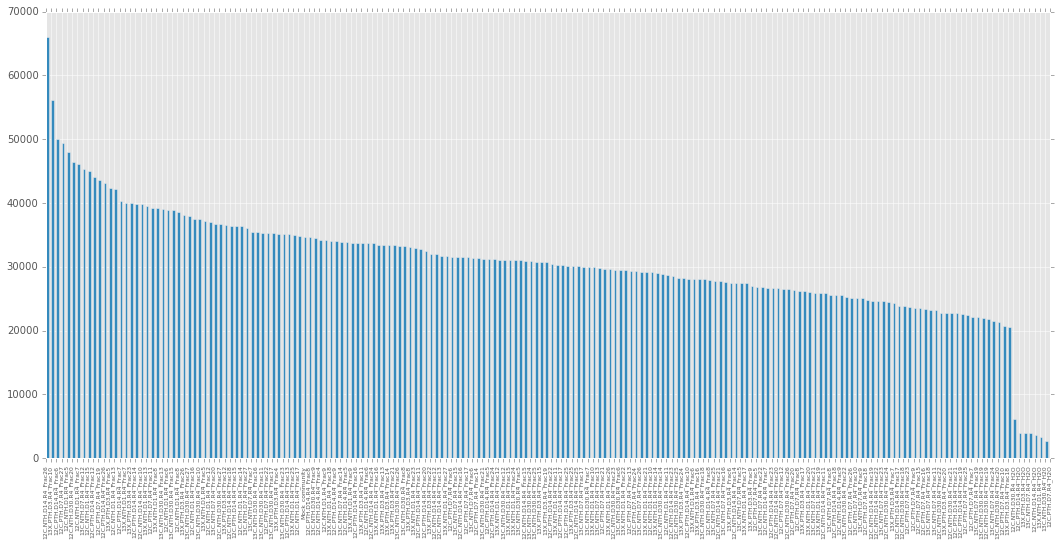

In [13]:
X = np.arange(len(cnt.keys()))
Y = [v for k, v in cnt.most_common()]
fig = plt.figure()
fig.set_size_inches((18,8))
ax = fig.add_subplot(111)
bars = ax.bar(X, Y, width=0.50)
xlims = ax.set_xlim((X.min(), X.max()))
xt = ax.set_xticks(X)
xtl = ax.set_xticklabels([k for k, v in cnt.most_common()], rotation=90, ha="center", size=6)

In [27]:
print (cnt.most_common())

[('12C.NTH.D14.R4_Frac26', 66050), ('13X.PTH.D3.R4_Frac10', 56089), ('12C.PTH.D14.R4_Frac6', 50019), ('12C.PTH.D7.R4_Frac27', 49402), ('12C.NTH.D1.R4_Frac5', 47937), ('12C.NTH.D30.R4_Frac20', 46395), ('12C.NTH.D1.R4_Frac7', 46039), ('13C.NTH.D7.R4_Frac12', 45286), ('12C.NTH.D1.R4_Frac15', 45046), ('12C.PTH.D14.R4_Frac12', 44056), ('12C.PTH.D7.R4_Frac19', 43571), ('12C.PTH.D14.R4_Frac26', 43197), ('13X.PTH.D3.R4_Frac5', 42387), ('12C.NTH.D1.R4_Frac13', 42269), ('12C.PTH.D14.R4_Frac7', 40255), ('13X.NTH.D1.R4_Frac7', 40063), ('13X.PTH.D3.R4_Frac23', 40035), ('12C.PTH.D14.R4_Frac14', 39893), ('12C.NTH.D14.R4_Frac10', 39799), ('13X.NTH.D1.R4_Frac13', 39495), ('12C.PTH.D7.R4_Frac11', 39217), ('13X.NTH.D1.R4_Frac8', 39144), ('13C.NTH.D30.R4_Frac13', 39108), ('12C.NTH.D1.R4_Frac6', 38941), ('13C.NTH.D30.R4_Frac15', 38929), ('12C.NTH.D1.R4_Frac8', 38628), ('13X.PTH.D3.R4_Frac26', 38087), ('13C.NTH.D30.R4_Frac27', 38028), ('12C.NTH.D1.R4_Frac16', 37558), ('13C.NTH.D30.R4_Frac10', 37414), ('13X.

In [26]:
filter(lambda x: x.attribute == '13Xle.PTH.D1.R4', cnt.most_common())

AttributeError: 'tuple' object has no attribute 'attribute'

In [14]:
! grep -c "13X.PTH.D1.R4" /var/seq_data/Chazy/515_806_SIP/Pool3/pear_merged_raw-2015-08-16.assembled.dmult.fastq

0
